In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('Day41.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.shape

(50, 5)

In [9]:
X = df.drop('Profit',axis=1)
y = df.Profit

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')
X = ct.fit_transform(X)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
# Build linear model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [15]:
y_pred = regressor.predict(x_test)

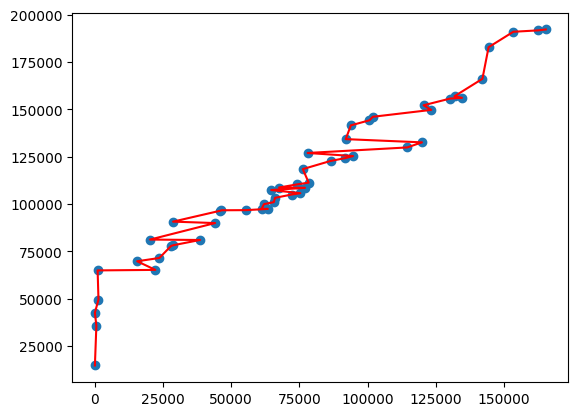

In [19]:
plt.scatter(df['R&D Spend'],df['Profit'])
plt.plot(df['R&D Spend'],df['Profit'],color='red')

# Polynomial regression

In [21]:
df = pd.read_csv('Day42.csv')

In [23]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [30]:
X = df[['Weight']]
y = df[['Height']]

In [31]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [32]:
regressor.fit(x_train,y_train)

LinearRegression()

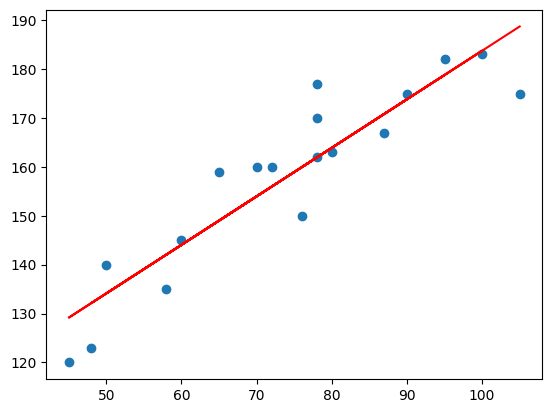

In [35]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regressor.predict(x_train),color='red')

## Build Polynomial Model

In [41]:
from sklearn.preprocessing import PolynomialFeatures
polynom = PolynomialFeatures(degree=2)
x_polynom = polynom.fit_transform(x_train)

In [42]:
# Fitting the model
polymodel = LinearRegression()
polymodel.fit(x_polynom,y_train)

LinearRegression()

In [44]:
# Prediction for the linear model
y_pred = regressor.predict(x_test)
y_pred

array([[178.78596815],
       [165.88485736],
       [140.08263577],
       [168.86203677],
       [129.16631126]])

In [46]:
y_predP = polymodel.predict(polynom.fit_transform(x_test))
y_predP

array([[176.72222353],
       [168.90876509],
       [139.68429934],
       [171.11416523],
       [121.86230901]])

In [47]:
from sklearn import metrics
r_sq = metrics.r2_score(y_test,y_pred)
r_sq

0.9481740815720396

In [52]:
# Predict value if the weight is = 53
regressor.predict([[53]])

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[137.10545636]])

In [50]:
r_sq = metrics.r2_score(y_test,y_predP)
r_sq

0.940692887948144

In [51]:
# Prediction for polynomial model
polymodel.predict(polynom.fit_transform([[53]]))

array([[135.145592]])